<a href="https://colab.research.google.com/github/eslamgamal97/Digit-Recognizer-with-keras/blob/main/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Packages**

In [1]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils
import matplotlib.pyplot as plt


**load Dataset**

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


**Display Sample data**

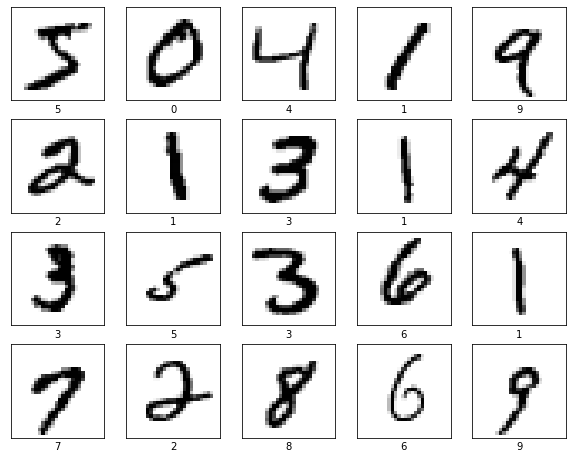

In [3]:
plt.figure(figsize=(10,10))

for i in range(20):
  plt.subplot(5,5,i + 1)
  plt.imshow(x_train[i], cmap='binary')
  plt.xlabel(str(y_train[i]))
  plt.xticks([])
  plt.yticks([])



**Normalize the data**

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
x_train = np.reshape(x_train, (60000, 784)) #784 = 28*28
x_train = x_train / 255.

x_test = np.reshape(x_test, (10000, 784))   #784 = 28*28
x_test = x_test / 255.

**Create a neural network model**

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid', input_shape=(784,)),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr = 0.001), metrics=['accuracy'])

**Train the model**

In [30]:
model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50, batch_size=1024,
    verbose=1
)

Epoch 1/50
59/59 [==============================] - 1s 10ms/step - loss: 0.0662 - accuracy: 0.9828 - val_loss: 0.1031 - val_accuracy: 0.9694
Epoch 2/50
59/59 [==============================] - 1s 9ms/step - loss: 0.0643 - accuracy: 0.9833 - val_loss: 0.1024 - val_accuracy: 0.9689
Epoch 3/50
59/59 [==============================] - 1s 9ms/step - loss: 0.0623 - accuracy: 0.9840 - val_loss: 0.1013 - val_accuracy: 0.9691
Epoch 4/50
59/59 [==============================] - 1s 9ms/step - loss: 0.0609 - accuracy: 0.9845 - val_loss: 0.1002 - val_accuracy: 0.9699
Epoch 5/50
59/59 [==============================] - 1s 9ms/step - loss: 0.0590 - accuracy: 0.9850 - val_loss: 0.0994 - val_accuracy: 0.9707
Epoch 6/50
59/59 [==============================] - 1s 9ms/step - loss: 0.0574 - accuracy: 0.9858 - val_loss: 0.0989 - val_accuracy: 0.9699
Epoch 7/50
59/59 [==============================] - 1s 9ms/step - loss: 0.0558 - accuracy: 0.9860 - val_loss: 0.0980 - val_accuracy: 0.9710
Epoch 8/50
59/59 [=

**Test the model**

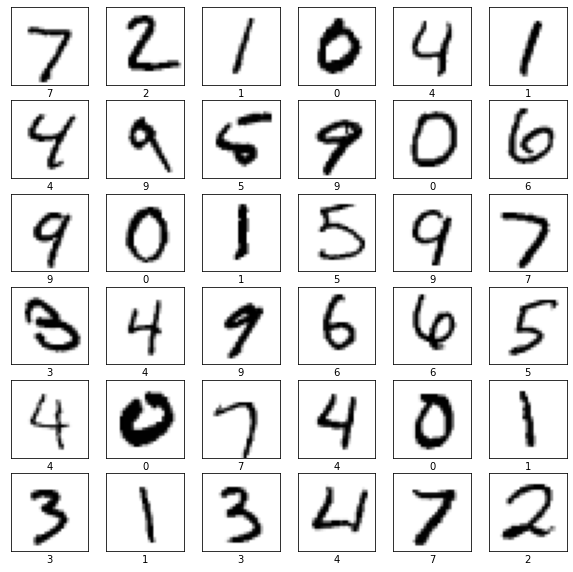

In [31]:
plt.figure(figsize = (10,10))

for i in range(36):
  plt.subplot(6,6, i + 1)
  image = x_test[i]
  img = np.reshape(image, (1,784))
  result = model.predict(img)
  pred = np.argmax(result)
  plt.imshow(np.reshape(x_test[i],(28,28)),cmap='binary')
  plt.xlabel(str(pred))
  plt.xticks([])
  plt.yticks([])

plt.show()

**Save the model as h5 file**

In [36]:
model.save('model.h5')

**Save the model on Drive**

In [37]:
#note: you must mount your drive before running this cell 
import shutil
shutil.move("/content/model.h5", "/content/drive/My Drive/digit_recognizer")

'/content/drive/My Drive/digit_recognizer'